In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/dataset_sms_spam_v1.csv')
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [3]:
df.isnull().sum()

Teks     0
label    0
dtype: int64

In [4]:
len(df)

1143

In [6]:
df['label'].value_counts()

0    569
1    335
2    239
Name: label, dtype: int64

Penjelasan Label <br>
0: sms normal <br>
1: fraud atau penipuan <br>
2: promo

In [8]:
normal = df[df['label']==0]
normal.head()

,Teks,label
574,Di kfc yg deket enhaii ada dy,0
575,"Maaf jika ada janji yang belum terpenuhi, jik...",0
576,*ngsih bunga ato coklat min,0
577,.sambl nunggu itu.. Gimana kalo ngerjain form ...,0
578,[Akademik] Untuk perhatian tuk jadwal kontrak ...,0


In [9]:
fraud = df[df['label']==1]
fraud.head()

,Teks,label
239,"Jika anda bermasalah dgn CC/KT@, stres dgn bun...",1
240,"Lelah byr min payment? Kami Solusinya, bantu s...",1
241,"Dana Tunai (KTA) bunga 0,99% hingga 300 jt. Sy...",1
242,“ROXI CELL” Hanya dengan Rp.100rb Anda bisa ja...,1
243,3 RAMADHAN Selamat Anda Pemenang Rp.100jt. PIN...,1


In [10]:
promo = df[df['label']==2]
promo.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [11]:
normal.shape, fraud.shape, promo.shape

((569, 2), (335, 2), (239, 2))

## Exploratory Data Analysis (EDA)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


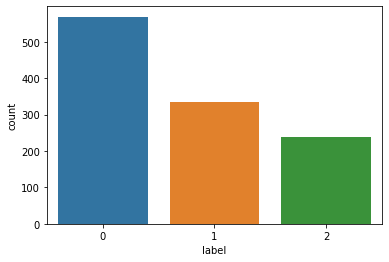

In [15]:
import seaborn as sns
sns.countplot(df['label'])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df['Teks'],df['label'], test_size=0.2, random_state=0, shuffle=True, stratify=df['label'])

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914,), (229,), (914,), (229,))

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [23]:
X_train = vectorizer.fit_transform(X_train)
X_train.shape

(914, 4335)

### Pipeline

In [31]:
rf = Pipeline([('tfidf', TfidfVectorizer()),
              ('classifier', RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [32]:
rf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [33]:
y_pred = rf.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[110,   2,   2],
       [  8,  55,   4],
       [  2,   0,  46]])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       114
           1       0.96      0.82      0.89        67
           2       0.88      0.96      0.92        48

    accuracy                           0.92       229
   macro avg       0.92      0.91      0.92       229
weighted avg       0.92      0.92      0.92       229



In [36]:
accuracy_score(y_test, y_pred)

0.9213973799126638

In [44]:
hasil = rf.predict(['Diskon 50%! Beli Smartphone Xtream Ultima X Prime hanya Rp1.999.500 di Web Beli Gadget. Buruan!'])
if hasil[0]==0:
  print("SMS Normal")
if hasil[0]==1:
  print("SMS Penipuan")
else:
  print("SMS Promo")

SMS Promo


In [57]:
svc = Pipeline([('tfidf', TfidfVectorizer()),
               ('classifier', SVC(C=2000, gamma = 'auto'))
              ])

In [58]:
svc.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=2000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decis

In [59]:
y_pred = svc.predict(X_test)

In [60]:
confusion_matrix(y_test,y_pred)


array([[111,   1,   2],
       [  3,  59,   5],
       [  2,   1,  45]])

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       114
           1       0.97      0.88      0.92        67
           2       0.87      0.94      0.90        48

    accuracy                           0.94       229
   macro avg       0.93      0.93      0.93       229
weighted avg       0.94      0.94      0.94       229



In [62]:
accuracy_score(y_test,y_pred)

0.9388646288209607

In [64]:
hasil = svc.predict(['Diskon 50%! Beli Smartphone Xtream Ultima X Prime hanya Rp1.999.500 di Web Beli Gadget. Buruan!'])
if hasil[0]==0:
  print("SMS Normal")
if hasil[0]==1:
  print("SMS Penipuan")
else:
  print("SMS Promo")

SMS Promo
